**Image transformation**



In [36]:
import cv2, skimage.data
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi, radians
import copy

**transformation with skimage.data.astronaut()**

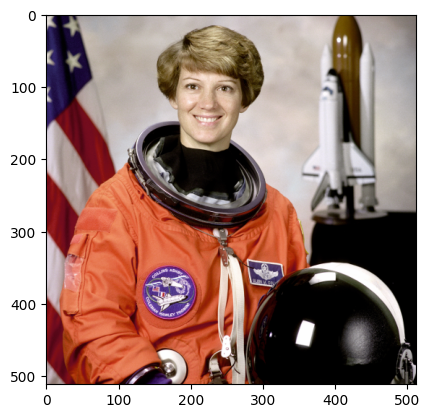

In [2]:
#original
img = skimage.data.astronaut()
h, w, _ = img.shape
plt.imshow(img)
plt.show()

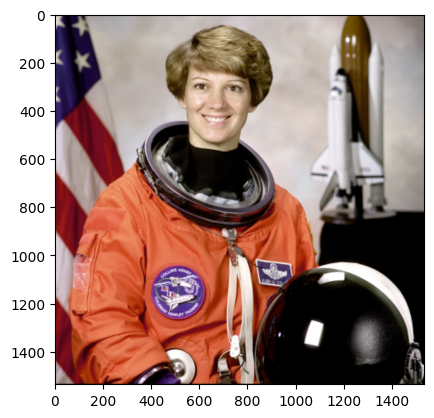

In [3]:
#scaling
scale_mtx = np.array([[3, 0, 0], [0, 3, 0], [0, 0, 1]], dtype=np.float32)
img_scale = cv2.warpPerspective(img, scale_mtx, (3 * w, 3 * h))
plt.imshow(img_scale)
plt.show()

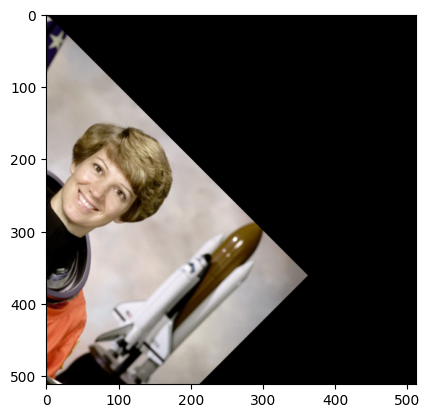

In [4]:
#rotation
rot_mtx = np.array([[cos(pi / 4), -sin(pi / 4), 0], [sin(pi / 4), cos(pi / 4), 0], [0, 0, 1]], dtype=np.float32)
img_rot = cv2.warpPerspective(img, rot_mtx, (w, h))
plt.imshow(img_rot)
plt.show()

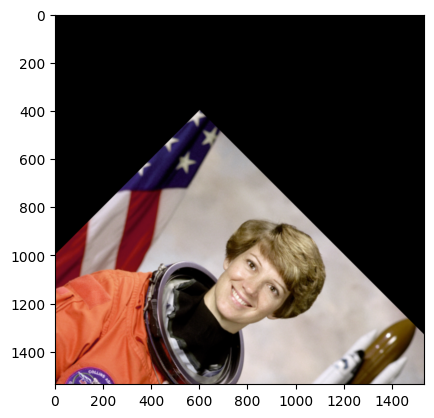

In [5]:
#similarity
sim_mtx = np.array([[3 * cos(pi / 4), -3 * sin(pi / 4), 600], [3 * sin(pi / 4), 3 * cos(pi / 4), 400], [0, 0, 1]], dtype=np.float32)
img_sim = cv2.warpPerspective(img, sim_mtx, (3 * w, 3 * h))
plt.imshow(img_sim)
plt.show()

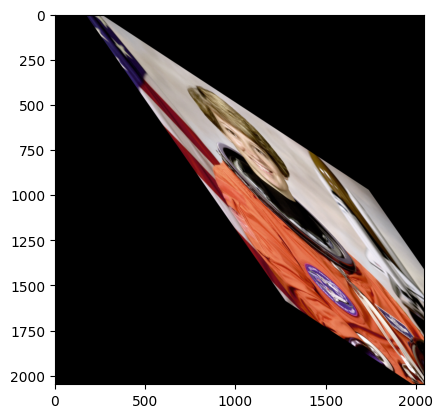

In [6]:
#affine
aff_mtx = np.array([[3.2, 2.3, 100], [2.1, 3.3, -100], [0, 0, 1]], dtype=np.float32)
img_aff = cv2.warpPerspective(img, aff_mtx, (4 * w, 4 * h))
plt.imshow(img_aff)
plt.show()

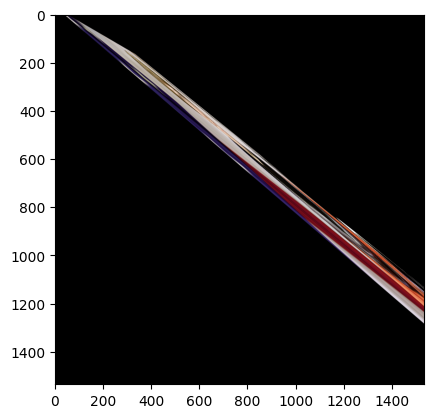

In [7]:
#own_param
proj_mtx = np.array([[2.3, 4.2, 12], [1.2, 3.7, -21], [0.005, -0.003, 1]], dtype=np.float32)
img_proj = cv2.warpPerspective(img, proj_mtx, (3 * w, 3 * h))
plt.imshow(img_proj)
plt.show()

**transformation with my own img**

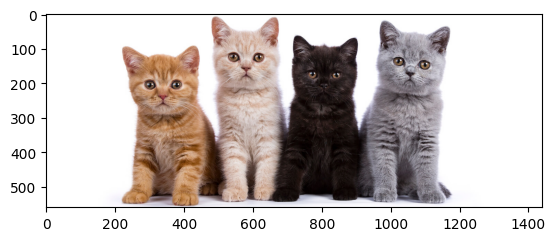

In [8]:
#original
img = cv2.imread('cats.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
plt.imshow(img)
plt.show()

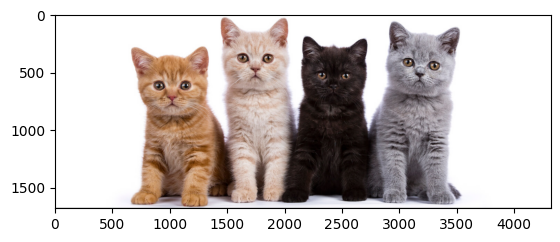

In [9]:
#scaling
scale_mtx = np.array([[3, 0, 0], [0, 3, 0], [0, 0, 1]], dtype=np.float32)
img_scale = cv2.warpPerspective(img, scale_mtx, (3 * w, 3 * h))
plt.imshow(img_scale)
plt.show()

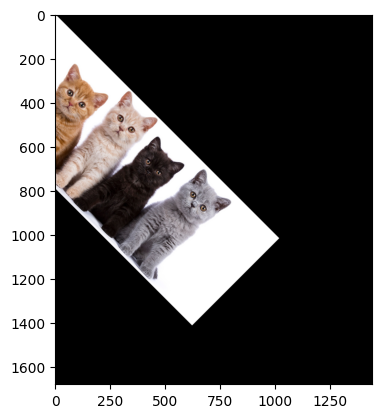

In [10]:
#rotation
rot_mtx = np.array([[cos(pi / 4), -sin(pi / 4), 0], [sin(pi / 4), cos(pi / 4), 0], [0, 0, 1]], dtype=np.float32)
img_rot = cv2.warpPerspective(img, rot_mtx, (w, 3 * h))
plt.imshow(img_rot)
plt.show()

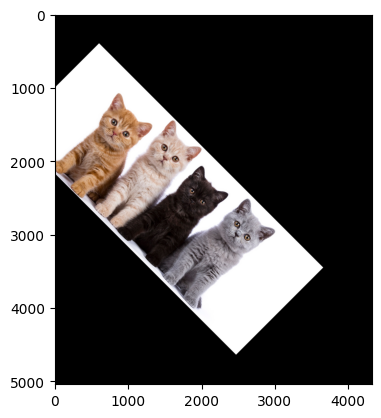

In [11]:
#similarity
sim_mtx = np.array([[3 * cos(pi / 4), -3 * sin(pi / 4), 600], [3 * sin(pi / 4), 3 * cos(pi / 4), 400], [0, 0, 1]], dtype=np.float32)
img_sim = cv2.warpPerspective(img, sim_mtx, (3 * w, 9 * h))
plt.imshow(img_sim)
plt.show()

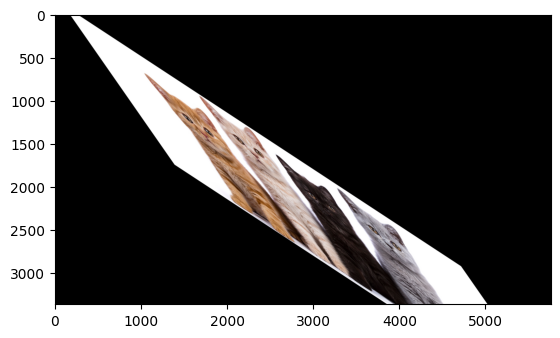

In [12]:
#affine
aff_mtx = np.array([[3.2, 2.3, 100], [2.1, 3.3, -100], [0, 0, 1]], dtype=np.float32)
img_aff = cv2.warpPerspective(img, aff_mtx, (4 * w, 6 * h))
plt.imshow(img_aff)
plt.show()

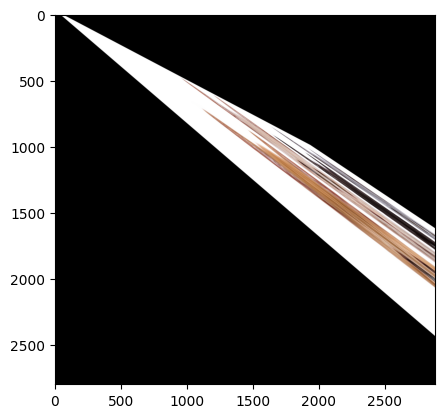

In [13]:
#own_param
proj_mtx = np.array([[2.3, 4.2, 12], [1.2, 3.7, -21], [0.0005, -0.003, 1]], dtype=np.float32)
img_proj = cv2.warpPerspective(img, proj_mtx, (2 * w, 5 * h))
plt.imshow(img_proj)
plt.show()

**Color Space**

**Color coordinates with skimage.data.astronaut()**

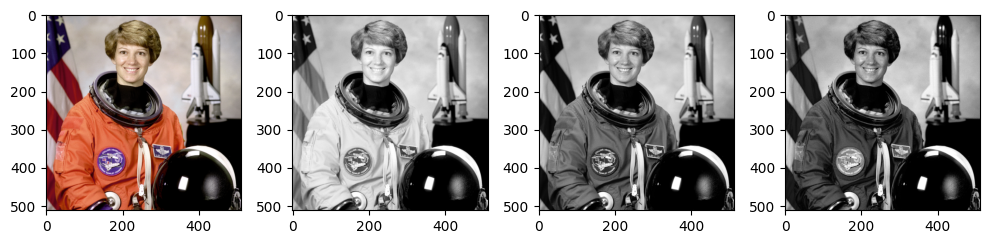

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
img = skimage.data.astronaut()
h, w, _ = img.shape
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)
ax[0].imshow(img)
ax[1].imshow(r, cmap='gray')
ax[2].imshow(g, cmap='gray')
ax[3].imshow(b, cmap='gray')
plt.tight_layout()
plt.show()

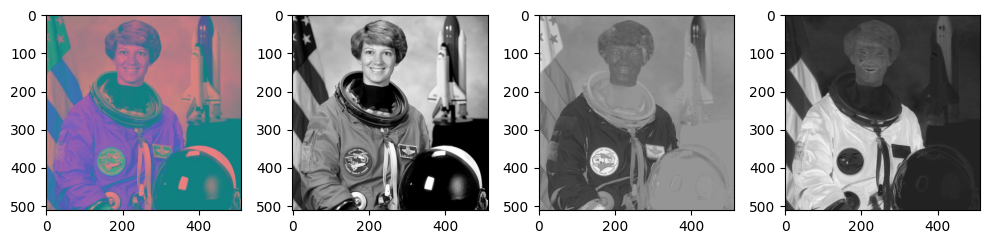

In [38]:
#RGB to YCbCr
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
y = (65.738 * r + 129.057 * g + 25.064 * b) / 256 + 16
cb = (-37.945 * r - 74.494 * g + 112.439 * b) / 256 + 128
cr = (112.439 * r - 94.154 * g - 18.285 * b) / 256 + 128
ax[1].imshow(y, cmap='gray')
ax[2].imshow(cb, cmap='gray')
ax[3].imshow(cr, cmap='gray')
y_exp = np.expand_dims(y, axis=2)
cb_exp = np.expand_dims(cb, axis=2)
cr_exp = np.expand_dims(cr, axis=2)
img_ycbcr = np.concatenate((y_exp, cb_exp, cr_exp), axis = 2).astype('uint8')
ax[0].imshow(img_ycbcr)
plt.tight_layout()
plt.show()

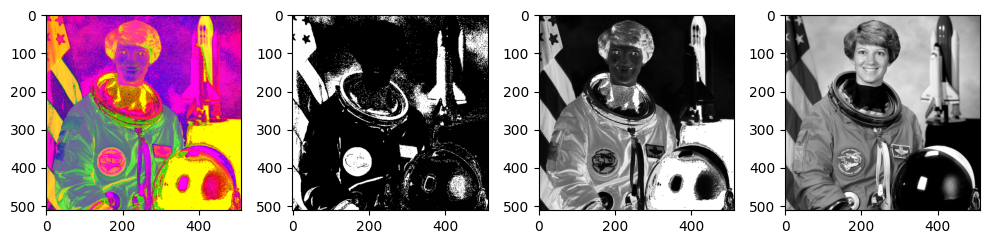

In [39]:
#RGB to HSI
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
r_norm = r / 255
g_norm = g / 255
b_norm = b / 255
intense = (r_norm + g_norm + b_norm) / 3
sat = 1 - np.minimum(r_norm, np.minimum(g_norm, b_norm)) / (intense + 0.001) #to deal with div 0 err
theta = np.arccos((2 * r_norm - g_norm - b_norm) / (2 * np.sqrt((r_norm - g_norm) ** 2 + (r_norm - b_norm) * (g_norm - b_norm)) + 0.001)) / 2 * pi
hue = np.zeros((h, w))
for i in range(h):
  for j in range(w):
    hue[i][j] = theta[i][j] if b_norm[i][j] <= g_norm[i][j] else 360 - theta[i][j]
ax[1].imshow(hue, cmap='gray')
ax[2].imshow(sat, cmap='gray')
ax[3].imshow(intense, cmap='gray')
h_exp = np.expand_dims(hue, axis=2)
s_exp = np.expand_dims(sat, axis=2)
i_exp = np.expand_dims(intense, axis=2)
img_hsi = np.concatenate((h_exp, s_exp, i_exp), axis = 2)
ax[0].imshow(img_hsi)
plt.tight_layout()
plt.show()


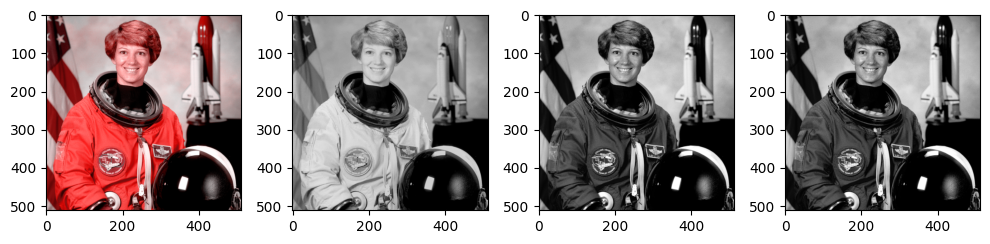

In [40]:
#HSI to RGB
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
h_modified = hue.copy()
for i in range(h):
  for j in range(w):
    if h_modified[i][j] <= 120:
      b_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      r_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
      g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
    elif h_modified[i][j] <= 240:
      h_modified[i][j] -= 120
      r_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      g_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
      b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
    else:
      h_modified[i][j] -= 240
      g_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      b_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
      r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

ax[1].imshow(r_pred, cmap='gray')
ax[2].imshow(g_pred, cmap='gray')
ax[3].imshow(b_pred, cmap='gray')
r_exp = np.expand_dims(r_pred, axis=2)
g_exp = np.expand_dims(g_pred, axis=2)
b_exp = np.expand_dims(b_pred, axis=2)
img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
ax[0].imshow(img_rgb)
plt.tight_layout()
plt.show()

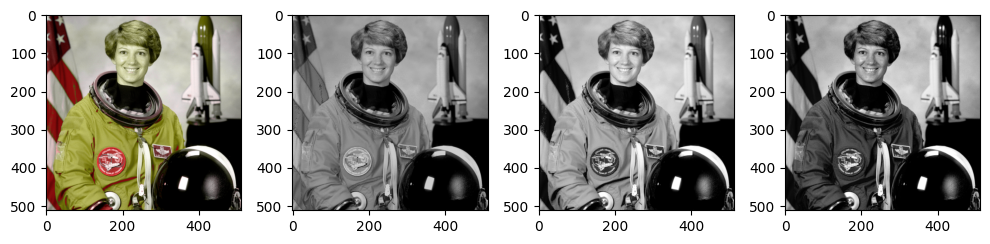

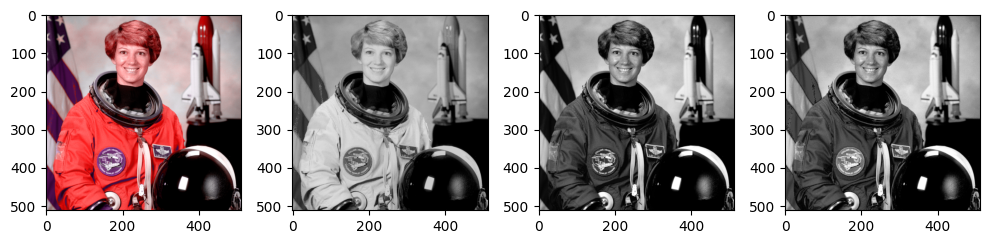

In [44]:
#different H
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [60, -60]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy() + diff[i]
  h_modified[h_modified < 0] = 0
  h_modified[h_modified > 360] = 360
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        r_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        g_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        b_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()

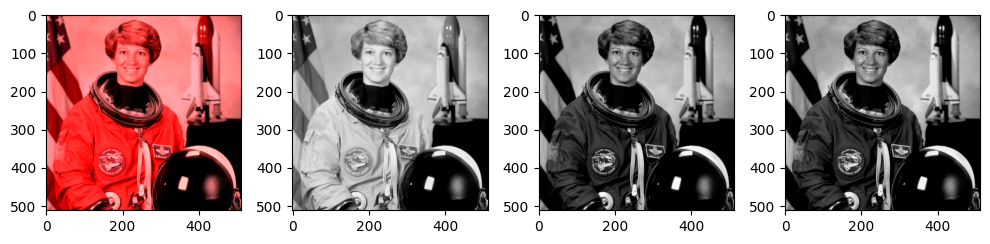

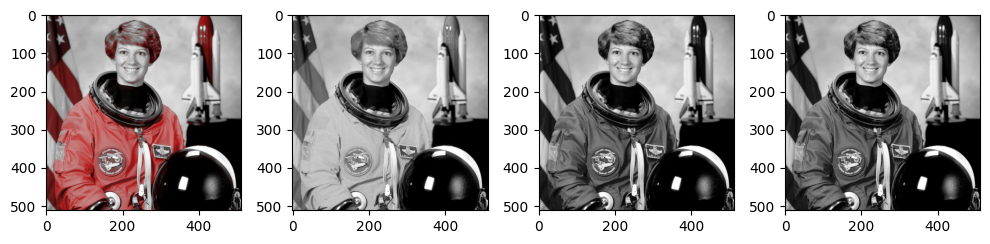

In [35]:
#different S
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [0.25, -0.25]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy()
  s_modified = sat.copy() + diff[i]
  s_modified[s_modified < 0] = 0
  s_modified[s_modified > 1] = 1
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        r_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        g_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        b_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()

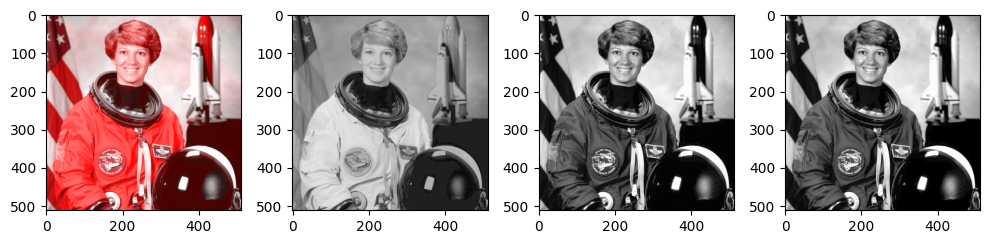

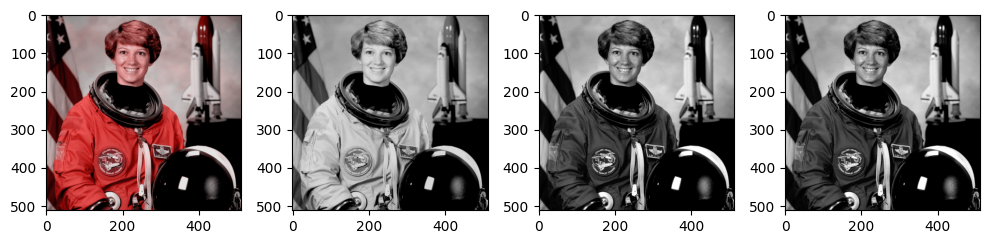

In [32]:
#different I
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [0.1, -0.1]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy()
  s_modified = sat.copy()
  i_modified = intense.copy() + diff[i]
  i_modified[i_modified < 0] = 0
  i_modified[i_modified > 1] = 1
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        r_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * i_modified[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        g_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * i_modified[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        b_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * i_modified[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()

**Color Coordinates with my own img**

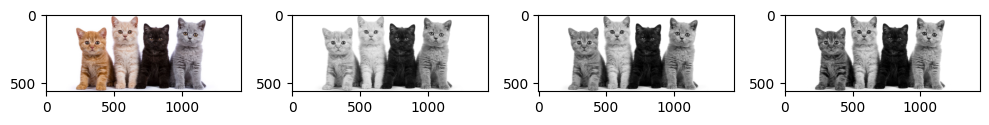

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
img = cv2.imread('cats.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
r = r.astype(np.float32)
g = g.astype(np.float32)
b = b.astype(np.float32)
ax[0].imshow(img)
ax[1].imshow(r, cmap='gray')
ax[2].imshow(g, cmap='gray')
ax[3].imshow(b, cmap='gray')
plt.tight_layout()
plt.show()

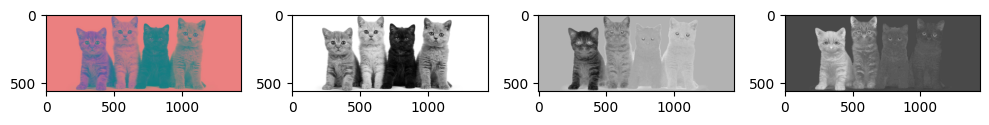

In [22]:
#RGB to YCbCr
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
y = (65.738 * r + 129.057 * g + 25.064 * b) / 256 + 16
cb = (-37.945 * r - 74.494 * g + 112.439 * b) / 256 + 128
cr = (112.439 * r - 94.154 * g - 18.285 * b) / 256 + 128
ax[1].imshow(y, cmap='gray')
ax[2].imshow(cb, cmap='gray')
ax[3].imshow(cr, cmap='gray')
y_exp = np.expand_dims(y, axis=2)
cb_exp = np.expand_dims(cb, axis=2)
cr_exp = np.expand_dims(cr, axis=2)
img_ycbcr = np.concatenate((y_exp, cb_exp, cr_exp), axis = 2).astype('uint8')
ax[0].imshow(img_ycbcr)
plt.tight_layout()
plt.show()

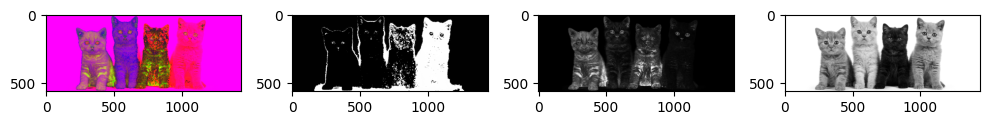

In [23]:
#RGB to HSI
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
r_norm = r / 255
g_norm = g / 255
b_norm = b / 255
intense = (r_norm + g_norm + b_norm) / 3
sat = 1 - np.minimum(r_norm, np.minimum(g_norm, b_norm)) / (intense + 0.001) #to deal with div 0 err
theta = np.arccos((2 * r_norm - g_norm - b_norm) / (2 * np.sqrt((r_norm - g_norm) ** 2 + (r_norm - b_norm) * (g_norm - b_norm)) + 0.001)) / 2 * pi
hue = np.zeros((h, w))
for i in range(h):
  for j in range(w):
    hue[i][j] = theta[i][j] if b_norm[i][j] <= g_norm[i][j] else 360 - theta[i][j]
ax[1].imshow(hue, cmap='gray')
ax[2].imshow(sat, cmap='gray')
ax[3].imshow(intense, cmap='gray')
h_exp = np.expand_dims(hue, axis=2)
s_exp = np.expand_dims(sat, axis=2)
i_exp = np.expand_dims(intense, axis=2)
img_hsi = np.concatenate((h_exp, s_exp, i_exp), axis = 2)
ax[0].imshow(img_hsi)
plt.tight_layout()
plt.show()

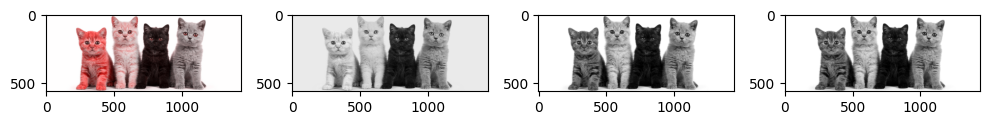

In [24]:
#HSI to RGB
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
for i in range(h):
  for j in range(w):
    if hue[i][j] <= 120:
      b_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      r_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(hue[i][j])) / cos(radians(60) - radians(hue[i][j])))
      g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
    elif hue[i][j] <= 240:
      hue[i][j] -= 120
      r_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      g_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(hue[i][j])) / cos(radians(60) - radians(hue[i][j])))
      b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
    else:
      hue[i][j] -= 240
      g_pred[i][j] = intense[i][j] * (1 - sat[i][j])
      b_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(hue[i][j])) / cos(radians(60) - radians(hue[i][j])))
      r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

ax[1].imshow(r_pred, cmap='gray')
ax[2].imshow(g_pred, cmap='gray')
ax[3].imshow(b_pred, cmap='gray')
r_exp = np.expand_dims(r_pred, axis=2)
g_exp = np.expand_dims(g_pred, axis=2)
b_exp = np.expand_dims(b_pred, axis=2)
img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
ax[0].imshow(img_rgb)
plt.tight_layout()
plt.show()

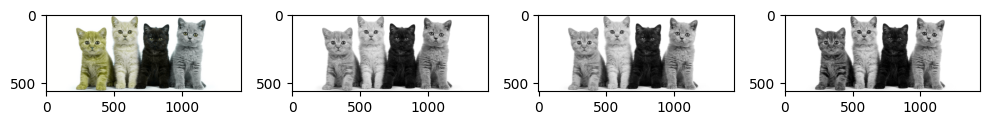

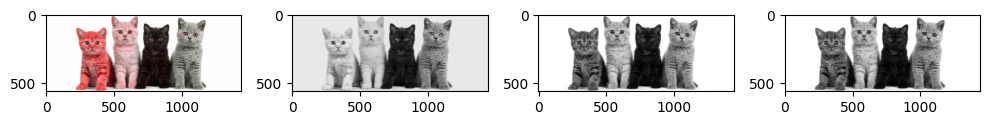

In [25]:
#different H
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [60, -60]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy() + diff[i]
  h_modified[h_modified < 0] = 0
  h_modified[h_modified > 360] = 360
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        r_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        g_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = intense[i][j] * (1 - sat[i][j])
        b_pred[i][j] = intense[i][j] * (1 + sat[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()

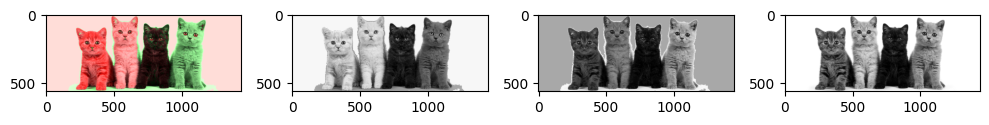

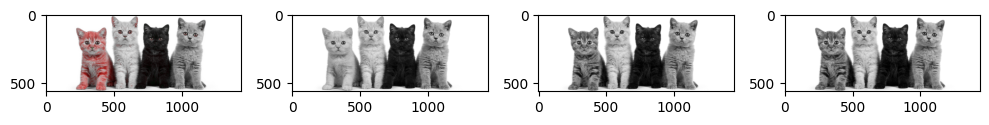

In [26]:
#different S
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [0.15, -0.15]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy()
  s_modified = sat.copy() + diff[i]
  s_modified[s_modified < 0] = 0
  s_modified[s_modified > 1] = 1
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        r_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        g_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * intense[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = intense[i][j] * (1 - s_modified[i][j])
        b_pred[i][j] = intense[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * intense[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()

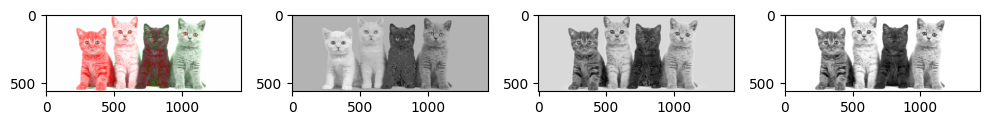

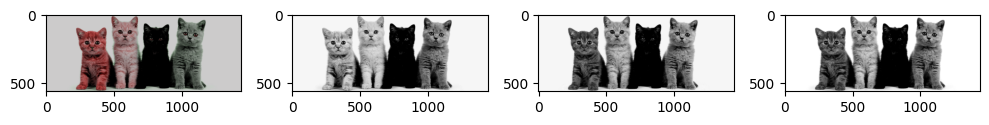

In [27]:
#different I
r_pred = np.zeros((h, w))
g_pred = np.zeros((h, w))
b_pred = np.zeros((h, w))
diff = [0.2, -0.2]

for i in range(2):
  fig, ax = plt.subplots(1, 4, figsize=(10, 6))
  h_modified = hue.copy()
  s_modified = sat.copy()
  i_modified = intense.copy() + diff[i]
  i_modified[i_modified < 0] = 0
  i_modified[i_modified > 1] = 1
  for i in range(h):
    for j in range(w):
      if h_modified[i][j] <= 120:
        b_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        r_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        g_pred[i][j] = 3 * i_modified[i][j] - (r_pred[i][j] + b_pred[i][j])
      elif h_modified[i][j] <= 240:
        h_modified[i][j] -= 120
        r_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        g_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        b_pred[i][j] = 3 * i_modified[i][j] - (r_pred[i][j] + g_pred[i][j])
      else:
        h_modified[i][j] -= 240
        g_pred[i][j] = i_modified[i][j] * (1 - s_modified[i][j])
        b_pred[i][j] = i_modified[i][j] * (1 + s_modified[i][j] * cos(radians(h_modified[i][j])) / cos(radians(60) - radians(h_modified[i][j])))
        r_pred[i][j] = 3 * i_modified[i][j] - (g_pred[i][j] + b_pred[i][j])

  ax[1].imshow(r_pred, cmap='gray')
  ax[2].imshow(g_pred, cmap='gray')
  ax[3].imshow(b_pred, cmap='gray')
  r_exp = np.expand_dims(r_pred, axis=2)
  g_exp = np.expand_dims(g_pred, axis=2)
  b_exp = np.expand_dims(b_pred, axis=2)
  img_rgb = np.concatenate((r_exp, g_exp, b_exp), axis = 2)
  ax[0].imshow(img_rgb)
  plt.tight_layout()
  plt.show()